# Twitter US Airline Sentiment

### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


### Dataset:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

### Objective:

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model

In [1]:
# Install and Import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import seaborn as sns                                   # Import seaborn.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

from sklearn.ensemble import RandomForestClassifier      
from sklearn.metrics import classification_report        
from sklearn.model_selection import cross_val_score 

import warnings

# filter out the DeprecationWarning message
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets_data=pd.read_csv("Tweets.csv")

In [3]:
# Printing the shape of the data.
tweets_data.shape

(14640, 15)

* There are 14640 rows and 15 columns in the dataset. 

In [4]:
# Print the column of the dataframe
tweets_data.columns                                           

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
#Checking the duplicate rows
tweets_data.duplicated().sum()

36

In [6]:
#Copying the dataset
data=tweets_data.copy()

In [7]:
data=data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
#Checking null values
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

* The three columns airline_sentiment_gold, negativereason_gold and tweet_coord are having lot of missing values. So, we can drop these columns later. 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

* 4 columns are numeric (int or float) and other 11 columns are object variables. 

In [11]:
# Printing first 5 rows of data.
data.head()                                              

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,5.692157e+17,7.782567e+14,5.675883e+17,5.685581e+17,5.694728e+17,5.698885e+17,5.703106e+17
airline_sentiment_confidence,14604.0,8.999228e-01,1.629550e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10503.0,6.376440e-01,3.303799e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14604.0,8.278554e-02,7.466473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


* There are 14604 tweets in total and everything is unique. Of the 14,604 tweets, the tweet with maximum number of retweets was only 44. Negative reason confidence count is 10503 and some data is missing in that field. 

In [13]:
data.describe(include=["object"]).T

,count,unique,top,freq
airline_sentiment,14604,3,negative,9159
negativereason,9159,10,Customer Service Issue,2904
airline,14604,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14604,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14604,14427,@united thanks,6
tweet_coord,1015,832,"[0.0, 0.0]",162
tweet_created,14604,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9881,3081,"Boston, MA",157


### Distribution of Values

In [14]:
category_col = ['airline_sentiment','airline','airline_sentiment_gold','negativereason_gold']
for i in category_col:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in airline_sentiment are :
negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64
**************************************************
Unique values in airline are :
United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
**************************************************
Unique values in airline_sentiment_gold are :
negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64
**************************************************
Unique values in negativereason_gold are :
Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight    

## Exploratory Data Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

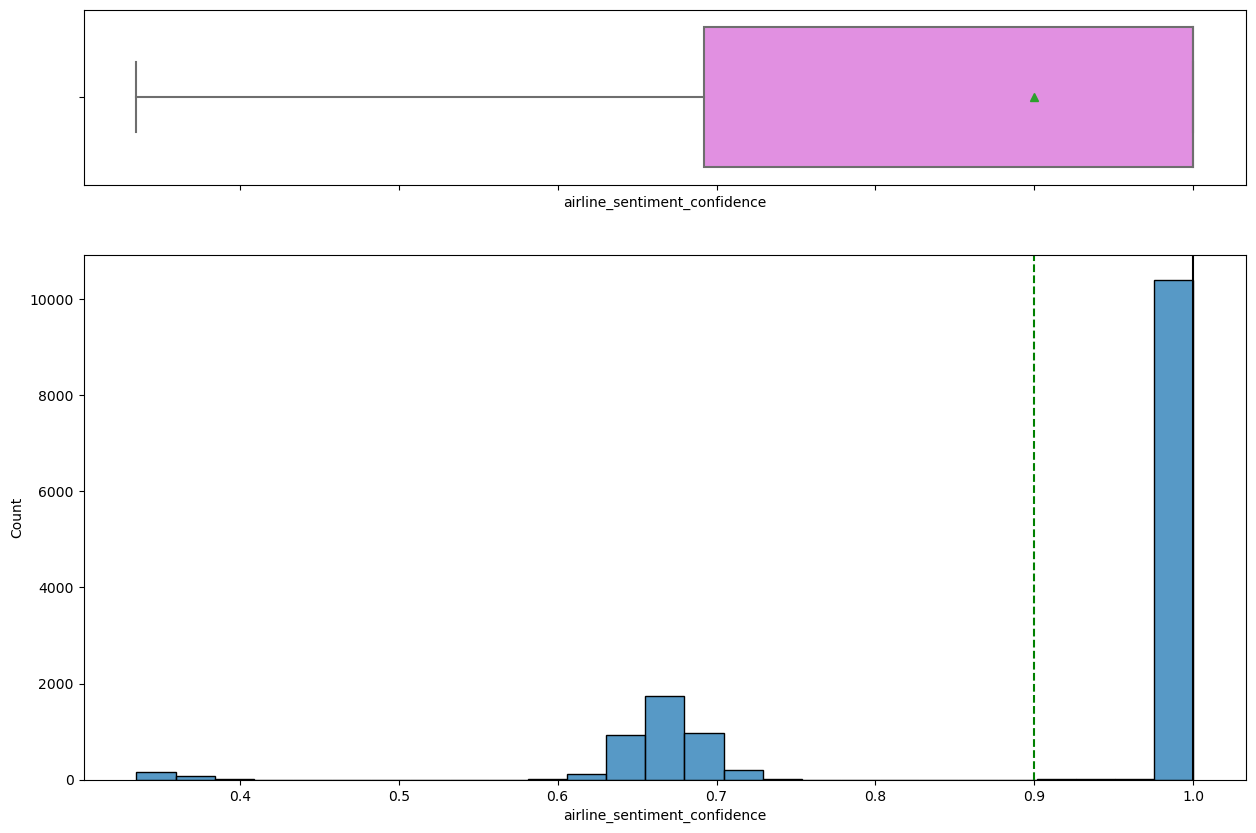

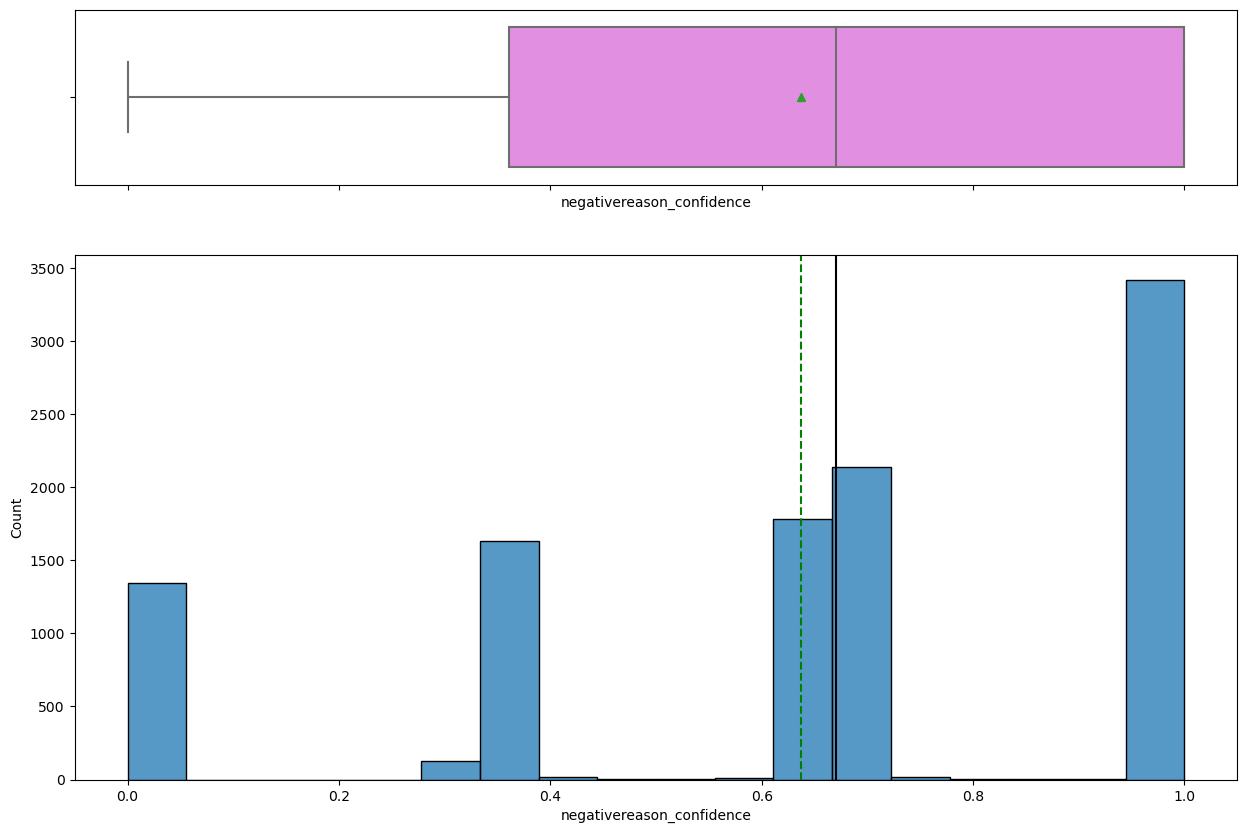

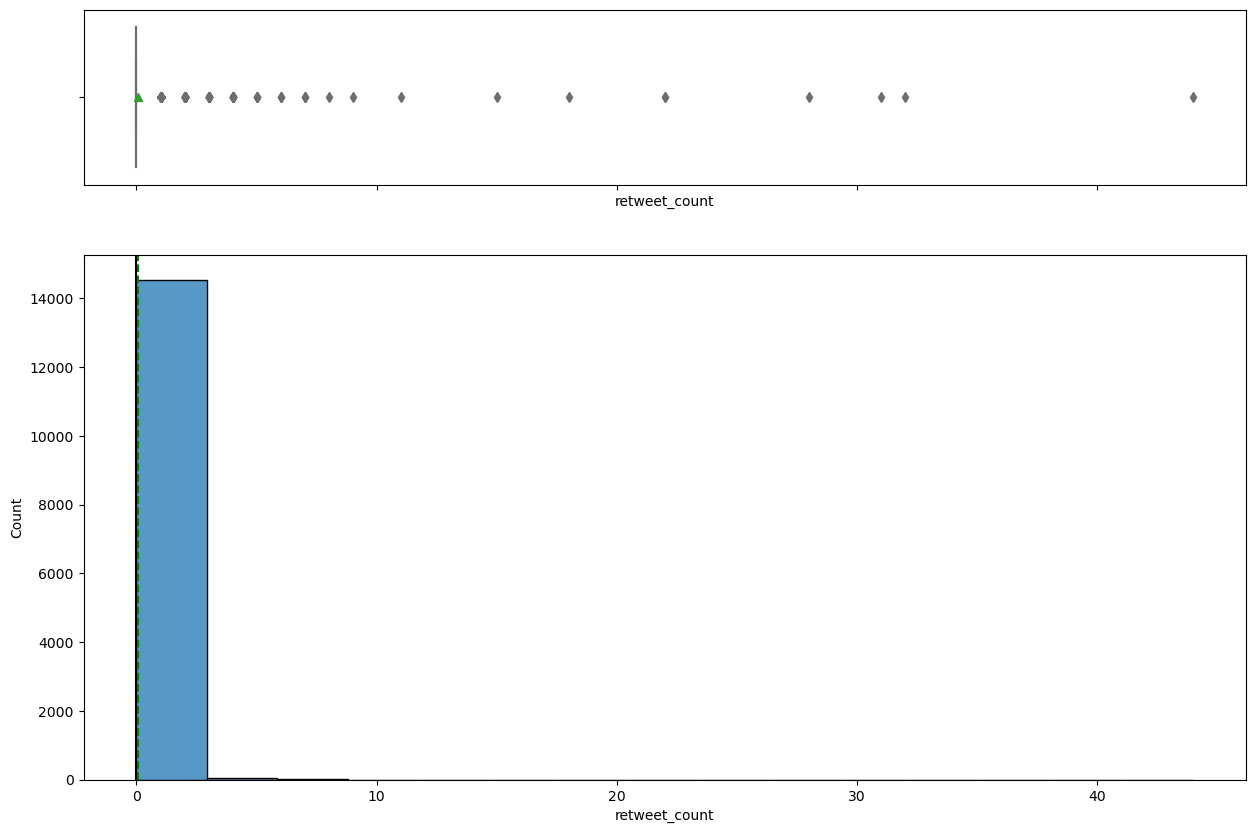

In [16]:
# select all numerical columns to understand further
numeric_col = [
    "airline_sentiment_confidence",
    "negativereason_confidence",
    "retweet_count",
]
for i in range(len(numeric_col)):
    histogram_boxplot(data, numeric_col[i])

### Observation

The above charts show the numeric column distribution. But these column and values are not going to impact the performance or analysis of this project. 

In [17]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

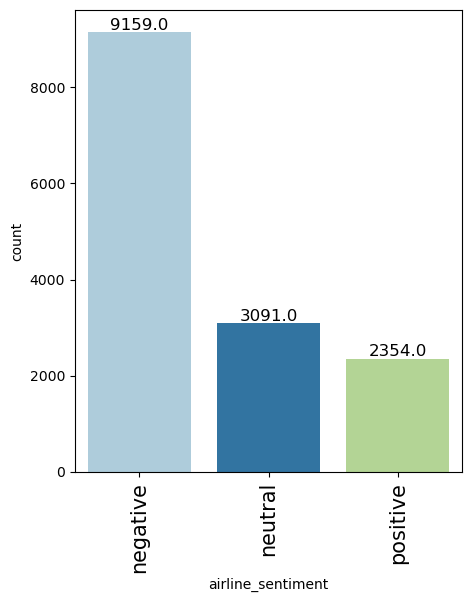

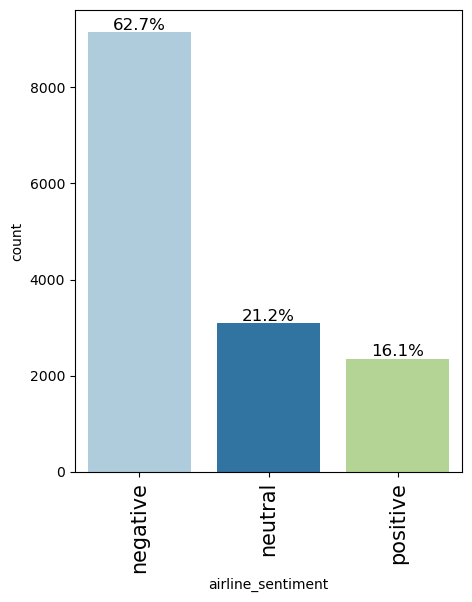

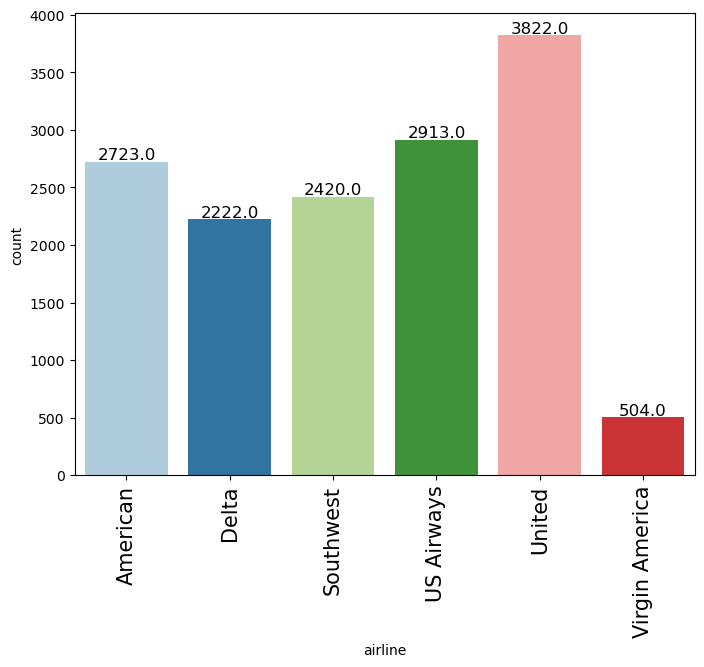

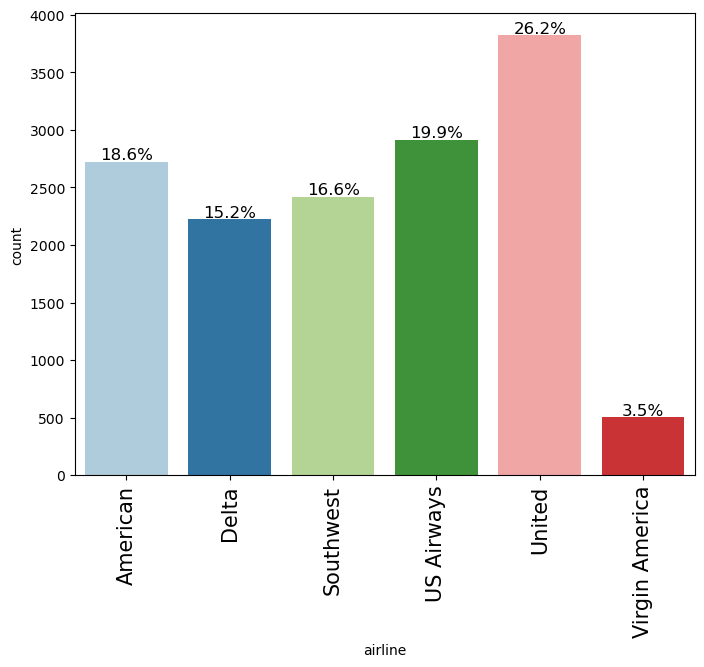

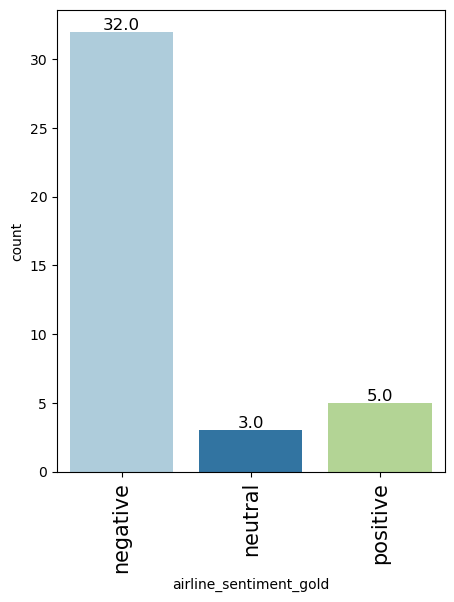

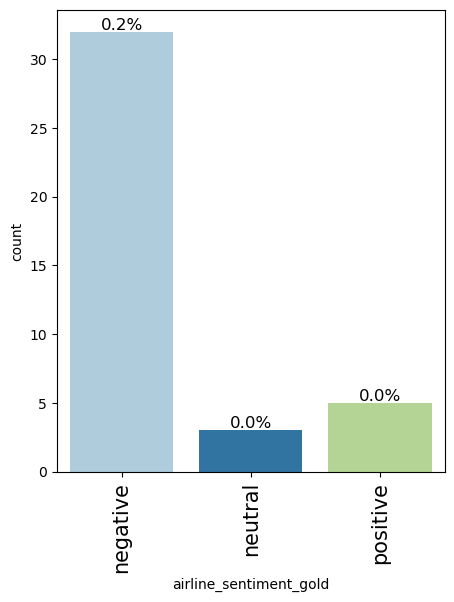

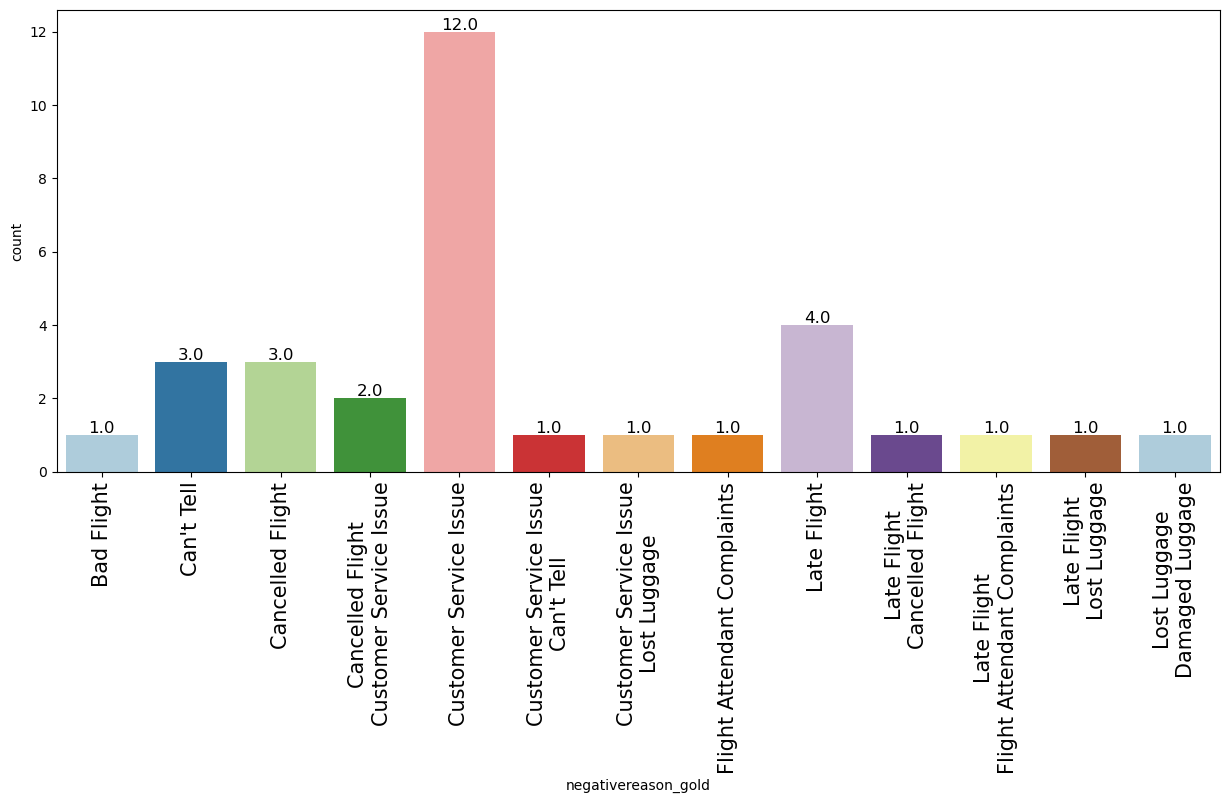

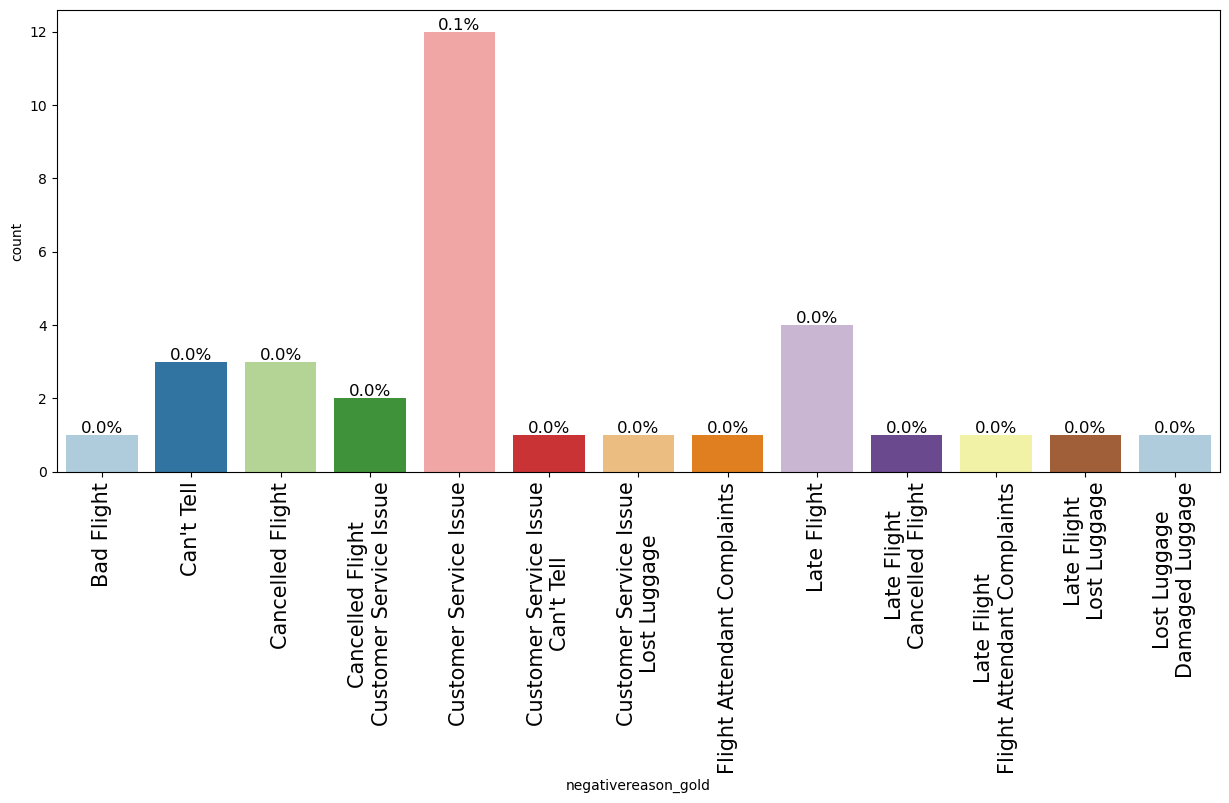

In [18]:
for i in range(len(category_col)):
    labeled_barplot(data, category_col[i])
    labeled_barplot(data, category_col[i], perc=True)

## Observations:

* There are lot of Negative tweets and then the Neutral, Positive.
* United Airlines has the most number tweets and Virgin America has the less tweets.
* Tweets are more regarding Customer Service Issue. 

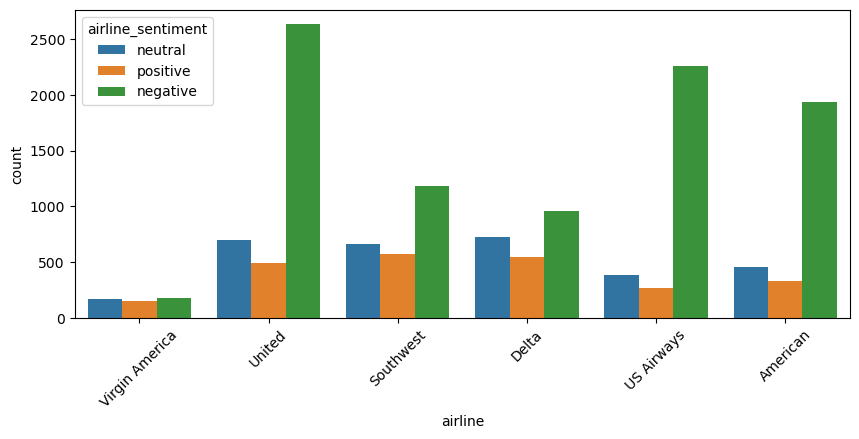

In [19]:
#Plot the distribution of Sentiment of tweets for each airline 
plt.figure(figsize=(10,4)) 
sns.countplot(data=data, x= "airline", hue="airline_sentiment")
plt.xticks(rotation=45)
plt.show()

#### Airline Sentiment distribution
* Every Airline has more Negative tweets, especially United airline followed by US Airways, American
* Also compare to neutral and postive, Neutral are little more tweets than the positive in all airlines

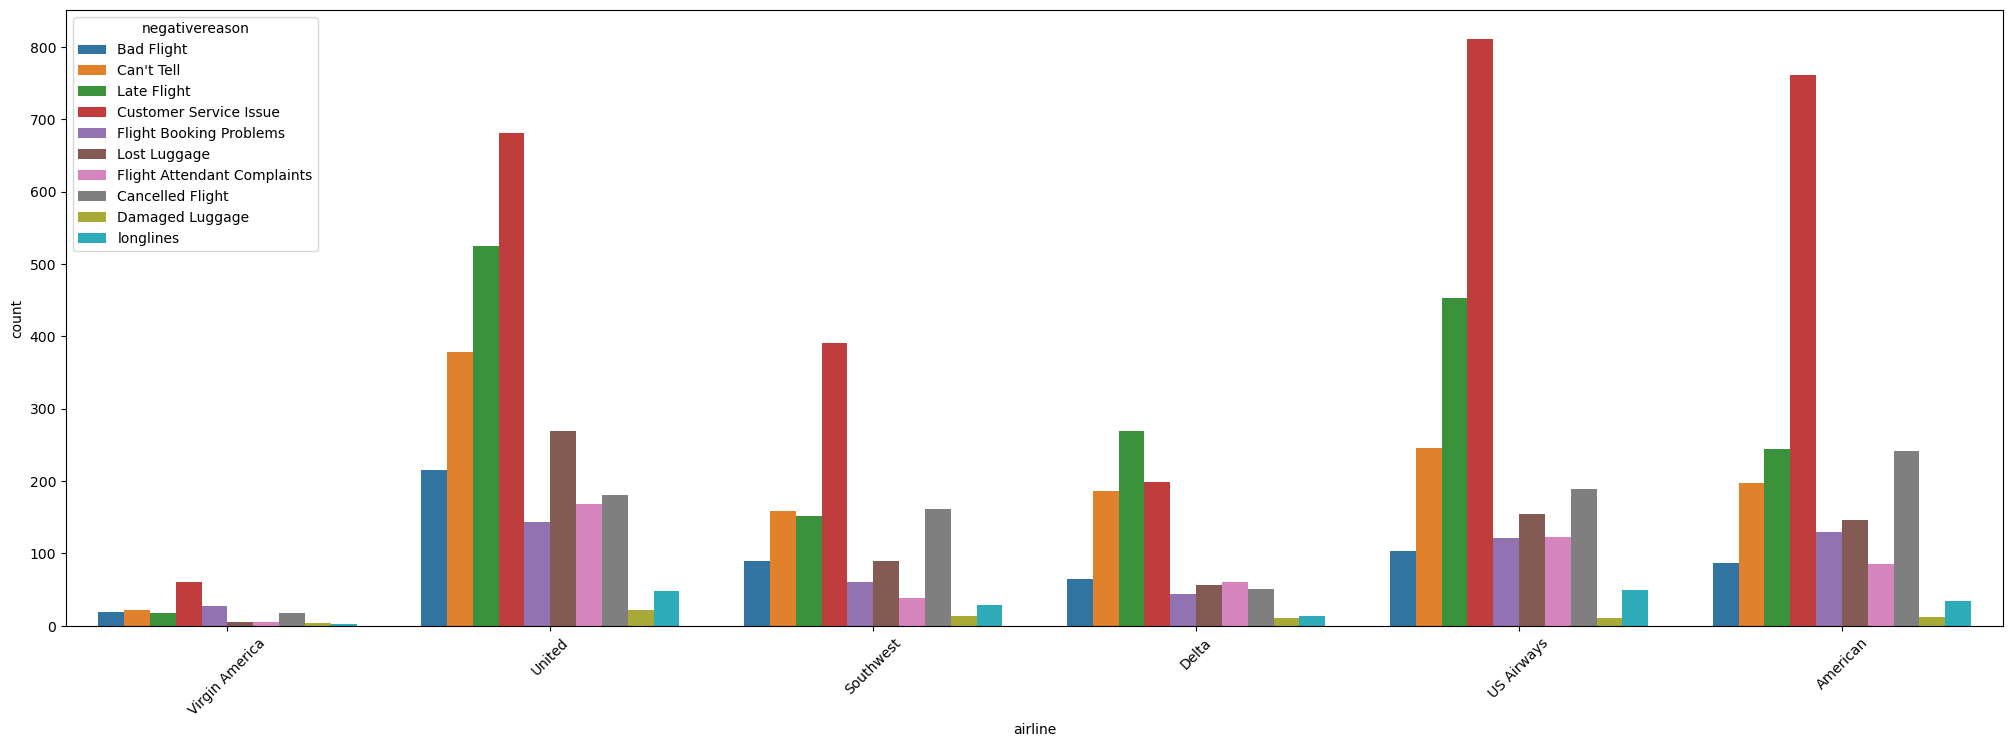

In [20]:
#plot the distribution of all the negative reasons for each airline
plt.figure(figsize=(25,8))
sns.countplot(data=data, x= "airline", hue="negativereason")
plt.xticks(rotation=45)
plt.show()

#### The top five reasons given for a negative tweet are:
* Customer Service Issue
* Late Flight
* Can't Tell
* Cancelled Flight
* Lost Luggage

## Word Cloud 

In [21]:
from wordcloud import WordCloud,STOPWORDS

### Negative Reviews

In [22]:
negative_reviews=data[data['airline_sentiment']== "negative"]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [23]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word)

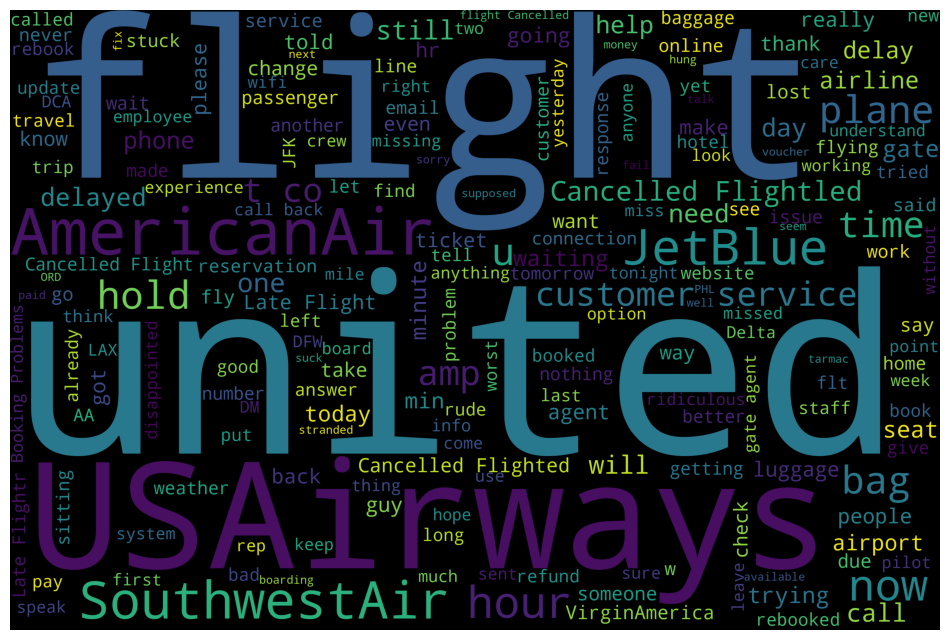

In [24]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Customers are complaining about Cancelled Flight, hold, delay, time & Late Flight. More reviews are in United and USAirways.

### Positive Reviews

In [25]:
positive_reviews=data[data['airline_sentiment']== "positive"]
words = ' '.join(positive_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [26]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word)

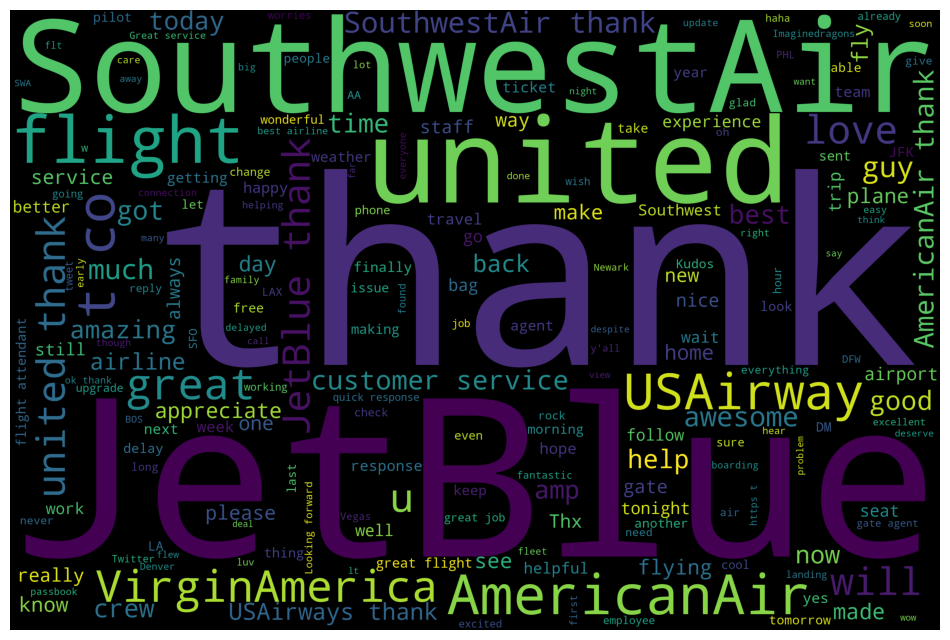

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Customers are thanking and appreciating. Here we can see JetBlue, SouthwestAir more. 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

## Dropping the columns

Few columns has lot of missing values. And tweet_id won't help in any analysis. So we can drop all the four columns. 

In [29]:
data.drop(["tweet_id","airline_sentiment_gold","negativereason_gold","tweet_coord"], axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14604 non-null  object 
 1   airline_sentiment_confidence  14604 non-null  float64
 2   negativereason                9159 non-null   object 
 3   negativereason_confidence     10503 non-null  float64
 4   airline                       14604 non-null  object 
 5   name                          14604 non-null  object 
 6   retweet_count                 14604 non-null  int64  
 7   text                          14604 non-null  object 
 8   tweet_created                 14604 non-null  object 
 9   tweet_location                9881 non-null   object 
 10  user_timezone                 9790 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB


# **Data Pre-processing:**

- Remove html tags.
- Tokenization.
- Remove the numbers.
- Removal of Special Characters and Punctuations.
- Removal of Stopwords.
- Conversion to lowercase.
- Lemmatize or stemming.

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

#### For our modeling we are just interested in text and airline_sentiment data. So we can keep only the two columns going forward.

In [31]:
#pd.options.mode.chained_assignment = None
df = data[["airline_sentiment","text"]]
print(df.shape)
df.head()

(14604, 2)


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [32]:
# remove html tag
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head()

C:\Users\saran\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\saran\AppData\Local\Temp\ipykernel_4076\1246181221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: strip_html(x))


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [33]:
#expand the contractions
def replace_contractions(text):
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\4026218023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: replace_contractions(x))


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [34]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\3124003094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_numbers(x))


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [35]:
#remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

df['text'] = df['text'].apply(lambda x: remove_special_characters(x, remove_digits=False))
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\3804266479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_special_characters(x, remove_digits=False))


,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials ...
2,neutral,VirginAmerica I did not today Must mean I need...
3,negative,VirginAmerica it is really aggressive to blast...
4,negative,VirginAmerica and it is a really big bad thing...


In [36]:
#remove url in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

df['text'] = df['text'].apply(lambda x: remove_url(x))
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\2830372707.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_url(x))


,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials ...
2,neutral,VirginAmerica I did not today Must mean I need...
3,negative,VirginAmerica it is really aggressive to blast...
4,negative,VirginAmerica and it is a really big bad thing...


In [37]:
# Tokenization of data
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\1631340934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commer..."
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean..."
3,negative,"[VirginAmerica, it, is, really, aggressive, to..."
4,negative,"[VirginAmerica, and, it, is, a, really, big, b..."


In [38]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [39]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\4114123086.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)


,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [40]:
df.tail()

,airline_sentiment,text
14635,positive,americanair thank get different flight chicago
14636,negative,americanair leave minutes late flight warn com...
14637,neutral,americanair please bring american airlines bla...
14638,negative,americanair money change flight not answer pho...
14639,neutral,americanair people need know many seat next fl...


* The pre-processing steps like HTML tag & url  removal, Removing numbers, special characters, punctuations are implemented on the data and we got the final input text for modeling. 

## Supervised Learning for Sentiment Analysis

### Building the model based on CountVectorizer and Random Forest

In [41]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(df['text'])

# Convert the data features to array.
data_features = data_features.toarray()                        

In [42]:
data_features.shape

(14604, 2000)

In [43]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
df["sentiment"]=df['airline_sentiment'].map({'negative':0,'neutral':1,'positive':2})

C:\Users\saran\AppData\Local\Temp\ipykernel_4076\2443306246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"]=df['airline_sentiment'].map({'negative':0,'neutral':1,'positive':2})


In [45]:
df.head()

,airline_sentiment,text,sentiment
0,neutral,virginamerica dhepburn say,1
1,positive,virginamerica plus add commercials experience ...,2
2,neutral,virginamerica not today must mean need take an...,1
3,negative,virginamerica really aggressive blast obnoxiou...,0
4,negative,virginamerica really big bad thing,0


In [46]:
labels = df["sentiment"]

In [47]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [48]:
X_train.shape

(10222, 2000)

In [49]:
X_test.shape

(4382, 2000)

In [50]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7118571910776068


### Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [51]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

In [52]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

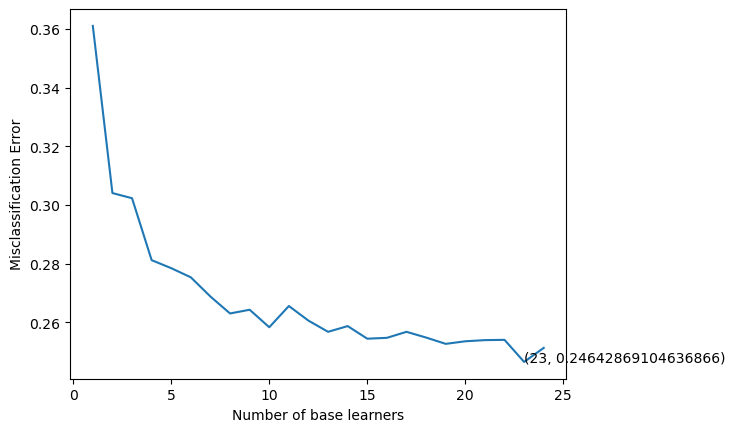

In [53]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [54]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7736193518941122

In [55]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2549  180   67]
 [ 368  415  102]
 [ 171  104  426]]
0.7736193518941122


<Axes: >

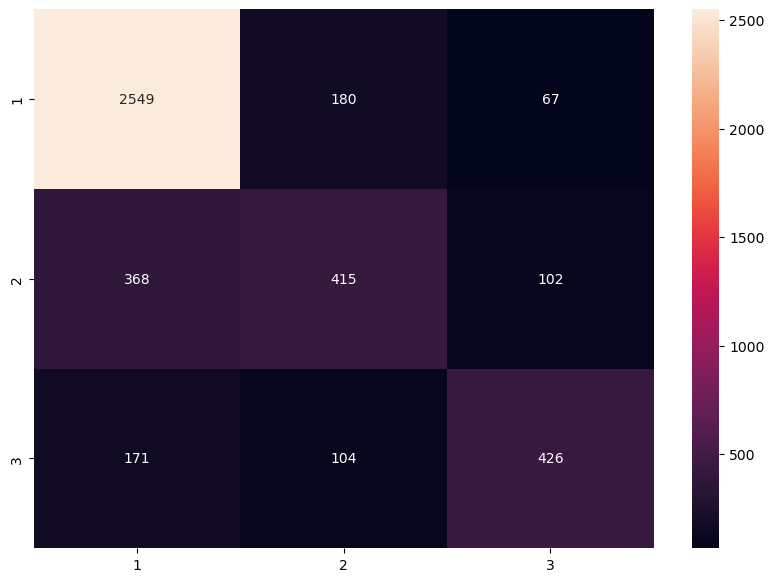

In [56]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### The score for this model with Count Vectorizer 77% and the Word Cloud can be prepared like below.

### Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model

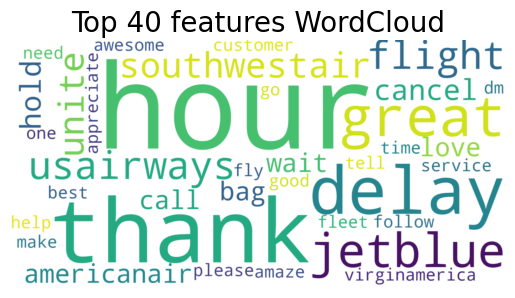

In [57]:
#all_features = bow_vec.get_feature_names()  
all_features = bow_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

* Main freatures using Count Vectorizer are hour, thank, delay etc. 

## Term Frequency(TF) - Inverse Document Frequency(IDF)

In [58]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()

data_features.shape

(14604, 2000)

In [59]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [60]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7026834964569274


In [61]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

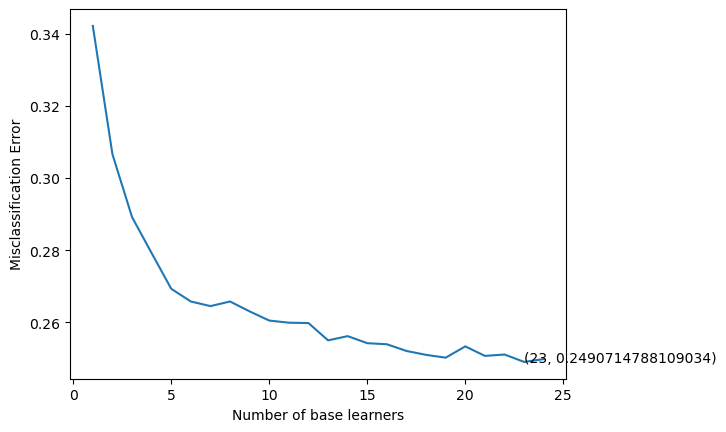

In [62]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [63]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7631218621633957

In [64]:
result = clf.predict(X_test)

[[2607  149   40]
 [ 446  364   75]
 [ 223  105  373]]
0.7631218621633957


<Axes: >

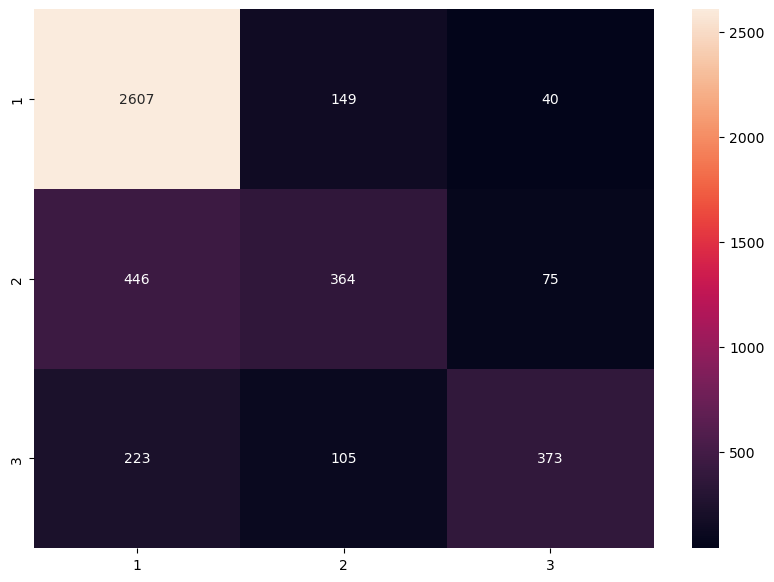

In [65]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### The score for this model with Count Vectorizer 76% and the Word Cloud can be prepared like below.

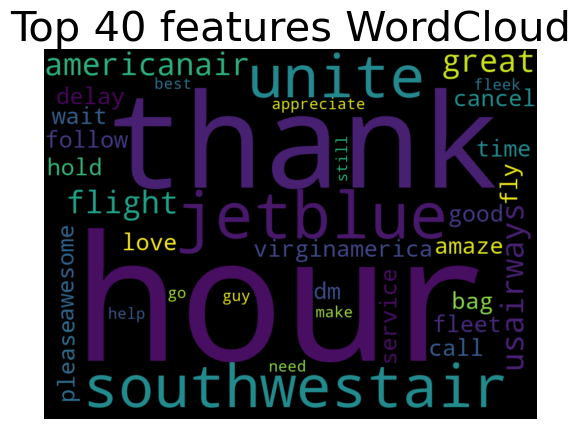

In [66]:
#all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
all_features = vectorizer.get_feature_names_out()  
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

* Main feature out of TF-IDF vectorizers are hour, thank, unite, etc.

* Just trying one more model using Gradient Boosting Classifier to check the performance.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_test, y_test)
result1 = gbc.predict(X_test)

[[2607  149   40]
 [ 446  364   75]
 [ 223  105  373]]
0.7615244180739389


<Axes: >

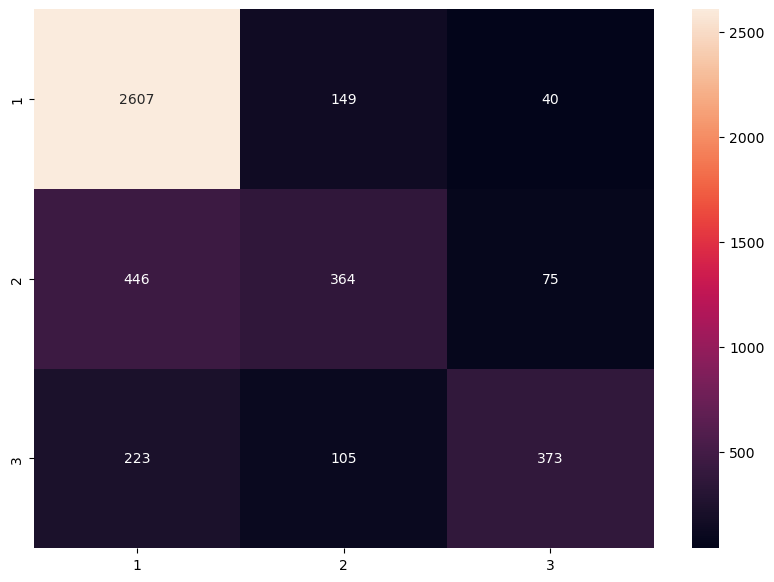

In [69]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result1 ,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### This model also performs the same way like the previous two. So, there is not so much difference between the models. 

## Summary

* The number of negative tweets is higher than the number of neutral and positive tweets. 
* Almost all airlines have higher negative tweets than positive and neutral tweets. 
* Customer service issue is the most frequent negative reason compare to the other negative feedbacks.
* Count Vectorizer and TF-IDF Vectorizer are used to convert text columns to input that fit for modeling. 
* Gradient Boosting and Random Forest models were used to classify the text and evaluate the performance. 

#### Performance
* The below three models are almost giving the same results and performing equally. So, anyone can be used.
    - Data transfored from text into numbers through a Count vectorizer with Random Forest model
    - Encoding text with TF-IDF using the Random Forest model 
    - Additional model with TF-IDF & Gradient Boosting Classifier 

#### Recommendation
* Given our analysis, each airline should understand which parts of the customer experience are most likely to drive positive and negative outcomes.
* Additionally, given these models, each airline should be able to react to tweets with negative sentiment far quicker than through tradtional survey methods
* SMOTE can be used to balance the target variable. The negative reason column can be merged with the text column to enrich the text, and the models can be run using the merged column.